In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Mall_Customers_dataset.csv', index_col = 0)
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [8]:
df.tail()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74
199,Male,32,137,18
200,Male,30,137,83


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [10]:
x = df.iloc[:,[2,3]].values

In [12]:
import scipy.cluster.hierarchy as sch

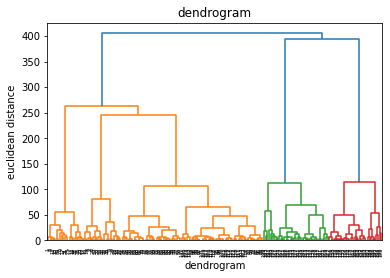

In [20]:
d = sch.dendrogram(sch.linkage(x, method = 'ward'))

plt.title('dendrogram')
plt.xlabel('dendrogram')
plt.ylabel('euclidean distance')
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
h = AgglomerativeClustering(n_clusters= 5, affinity='euclidean', linkage = 'ward')

In [23]:
y_predict = h.fit_predict(x)

In [24]:
y_predict

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [25]:
df['cluster'] = y_predict

In [26]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,,,
1,Male,19,15,39,4
2,Male,21,15,81,3
3,Female,20,16,6,4
4,Female,23,16,77,3
5,Female,31,17,40,4
...,...,...,...,...,...
196,Female,35,120,79,2
197,Female,45,126,28,0
198,Male,32,126,74,2


In [31]:
df = df.rename({
    'Annual Income (k$)': 'income',
    'Spending Score (1-100)': 'score'
}, axis=1)

In [32]:
sf0 = df[df.cluster == 0]
sf1 = df[df.cluster == 1]
sf2 = df[df.cluster == 2]
sf3 = df[df.cluster == 3]
sf4 = df[df.cluster == 4]

In [33]:
df

,Genre,Age,income,score,cluster
CustomerID,,,,,
1,Male,19,15,39,4
2,Male,21,15,81,3
3,Female,20,16,6,4
4,Female,23,16,77,3
5,Female,31,17,40,4
...,...,...,...,...,...
196,Female,35,120,79,2
197,Female,45,126,28,0
198,Male,32,126,74,2


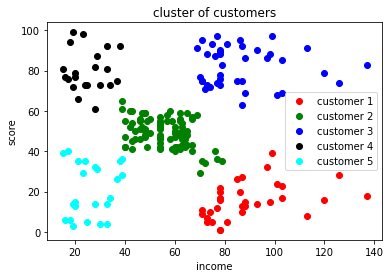

In [36]:
plt.scatter(sf0.income , sf0.score, color = 'red', label = 'customer 1')
plt.scatter(sf1.income , sf1.score, color = 'green', label = 'customer 2')
plt.scatter(sf2.income , sf2.score, color = 'blue', label = 'customer 3')
plt.scatter(sf3.income , sf3.score, color = 'black', label = 'customer 4')
plt.scatter(sf4.income , sf4.score, color = 'cyan', label = 'customer 5')

plt.title('cluster of customers')
plt.xlabel('income')
plt.ylabel('score')
plt.legend()
plt.show()